#ANN For Regression

##Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.17.0'

##Load the dataset

In [5]:
dataset = pd.read_excel('/content/Energy.xlsx')
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X,y,sep='\n\n')

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


##Splitting the dataset into training and testing set

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2 , random_state = 0)

##Building the ANN

In [8]:
ann = tf.keras.models.Sequential()

###Add first input layer and first hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

###Add second hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

###Add the output layer

In [11]:
ann.add(tf.keras.layers.Dense(units = 1,activation = 'linear'))

##Training the ANN

###Compiling the ANN

In [15]:
ann.compile(optimizer = 'adam' , loss = 'mean_squared_error',metrics = ['accuracy'])

###Training the ANN on the training set

In [16]:
ann.fit(X_train , y_train , batch_size = 32 , epochs = 100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 68976.1094
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 477.2523
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 395.1568
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 373.4345
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 375.2281
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 364.1567
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 339.7485
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 324.7531
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 308.1739
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 301.7440
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

###Predicting the results

In [17]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[431.72 431.23]
 [462.85 460.01]
 [466.37 461.14]
 ...
 [473.57 473.26]
 [440.43 438.  ]
 [459.61 463.28]]


###Visualize results

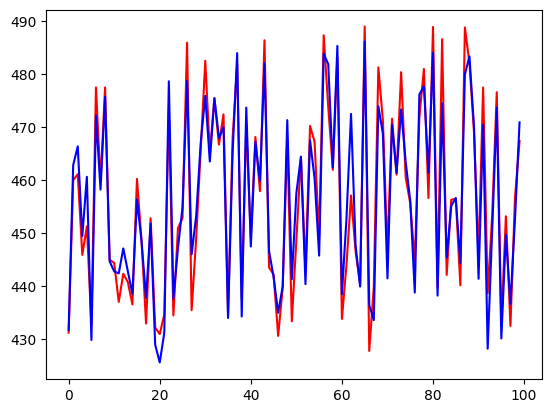

In [28]:
plt.plot(y_test[0:100],color='red')
plt.plot(y_pred[0:100],color='blue')
plt.show()

In [20]:
dataset.shape

(9568, 5)